In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tm_develop import TrajectoryMatching
from misc import mean_squared_displacement as msd, density, plot_1component

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

PATH = "/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/"

steps_between_points = 40
configurations = 5

x1 = np.linspace(6.75, 18, 10000)
x2 = np.linspace(5.75, 18, 10000)
x_fit = np.linspace(6.5, 25, 10000)
x_plot = np.linspace(5.7, 18, 10000)

In [2]:
T = 350
print(f"T = {T}\n-------------")
outfile = f"/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_npt_{T}.out"
params = range(-1, -21, -2)
hardener_tm = TrajectoryMatching(outfile_path=outfile, basis=basis_function, basis_parameters=params,
                                   simulation_timestep=0.5, cutoff=50, system_style='molecular',
                                   every_n_from_output=steps_between_points, timesteps_in_fit=configurations)

hardener_tm.prepare_training_data()
density(hardener_tm)
print("\n")
#r_npt_350, g_ave_npt_350 = hardener_tm.plot_rdf(outfile_path=f"/home/markjenei/polymerisation-coarse-graining/dgeba_hardener/hardener/hardener_rdf_npt_{T}.png", plot=False)
#msd_npt_350 = msd(hardener_tm.r)
hardener_tm.weights = np.load(PATH + f"hardener_npt_{T}.npy")

T = 350
-------------


loading data: 100%|██████████| 5/5 [00:00<00:00,  7.61it/s]


preparing input
density: 0.5891189517394074 g/cm3




2186


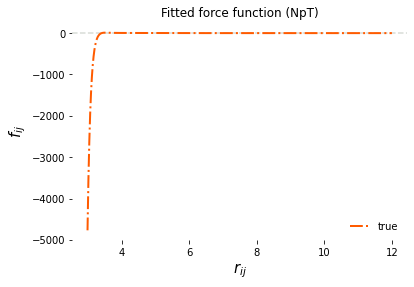

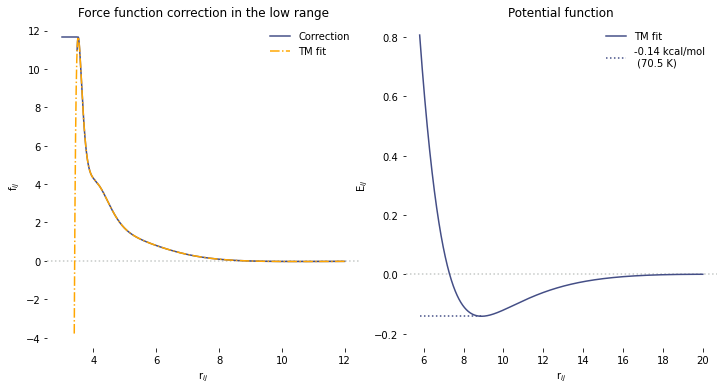

In [71]:
x1 = np.linspace(2.985, 12, 10000)
y = hardener_tm.predict(x1, correct=False)[0]
plot_1component(x1, y)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.15, hspace=None)

ax[0].axhline(0, ls=':', color='xkcd:silver')
ax[0].plot(x1[0:550], [max(y)] * 550, color='#444e86')
ax[0].plot(x1[550:], y[550:], label="Correction", ls='-', color='#444e86')
ax[0].plot(x1[450:], y[450:], label="TM fit", ls='-.', color='#ffa600')
ax[0].legend(frameon=False)
ax[0].set_title("Force function correction in the low range")
ax[0].set_xlabel(r"r$_{ij}$")
ax[0].set_ylabel(r"f$_{ij}$")
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
ax[0].spines["bottom"].set_visible(False)
ax[0].spines["left"].set_visible(False)

x1 = np.linspace(5.8, 20, 10000)
y = hardener_tm.predict(x1, correct=False)[0]
y_e = np.array(hardener_tm.predict_energy(x1, force=y)[0])
print(np.where(y_e == min(y_e))[0][0])

ax[1].axhline(0, ls=':', color='xkcd:silver')
ax[1].plot(x1, y_e, color='#444e86', label='TM fit')
ax[1].plot([x1[0], x1[np.where(y_e == min(y_e))[0][0]]], [min(y_e), min(y_e)], ls=':', color='#444e86', label=f'{np.round(min(y_e), 2)} kcal/mol \n (70.5 K)')
ax[1].set_ylim([-0.25, 0.85])
ax[1].legend(frameon=False)
ax[1].set_title("Potential function")
ax[1].set_xlabel(r"r$_{ij}$")
ax[1].set_ylabel(r"E$_{ij}$")
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
ax[1].spines["bottom"].set_visible(False)
ax[1].spines["left"].set_visible(False)
plt.savefig("/home/markjenei/hardener_fit.png", bbox_inches='tight')

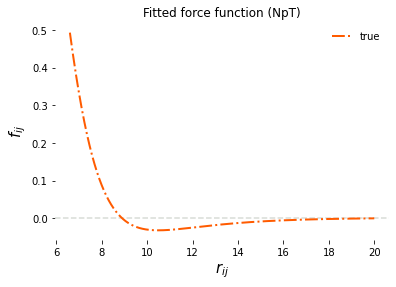

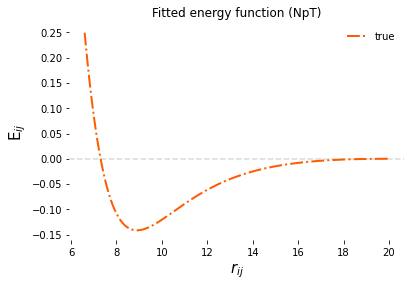

In [19]:
x1 = np.linspace(6.6, 20, 10000)
y = hardener_tm.predict(x1, correct=False)[0]
y_e = hardener_tm.predict_energy(x1, force=y)[0]

plot_1component(x1, y, output_path="/home/markjenei/hardener_force.png")
plot_1component(x1, y_e, output_path="/home/markjenei/hardener_energy.png", y_label=r"E$_{ij}$", title="Fitted energy function")